# Logistic Reggression from scratch

## Case Study - Admission grant by a university to students using two examination's marks

###  Necessary imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as opt

### Load local data into the program

In [2]:
def load_data(path):
    data = pd.read_csv(path, header = None)
    
    return data

data = load_data("marks.txt")

### Data Pre-processing

In [3]:
X = data.iloc[0:90,0:2]

m = X.shape[0]         # Training samples

X_test = data.iloc[m:data.shape[0],0:2]
X_test = np.c_[np.ones((data.shape[0]-m,1)), X_test]

y = np.array(data.iloc[0:m,2]).reshape((m,1))
y_test = np.array(data.iloc[m:data.shape[0],2]).reshape((data.shape[0]-m,1))

X = np.c_[np.ones((m,1)), X]
theta = np.array(np.zeros((X.shape[1],1)))

admitted = data.iloc[0:m,:].loc[ y == 1 ]                        
admitted = np.array(admitted.iloc[:, 0:2])

not_admitted = data.iloc[0:m,:].loc[ y == 0 ]
not_admitted = np.array(not_admitted.iloc[:, 0:2])
y_test

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

### Feature Scaling - Normalization

In [4]:
_X = np.array(np.zeros((X.shape)))
_admitted = np.array(np.zeros((admitted.shape)))
_not_admitted = np.array(np.zeros((not_admitted.shape)))

x1_avg = np.sum(X[:,1])/m
x1_range = np.max(X[:,1]) - np.min(X[:,1])

x2_avg = np.sum(X[:,2])/m
x2_range = np.max(X[:,2]) - np.min(X[:,2])

_X[:,1] = (X[:,1] - x1_avg)/x1_range
_X[:,2] = (X[:,2] - x2_avg)/x2_range


ad_x1_avg = np.sum(admitted[:,0])/m
ad_x1_range = np.max(admitted[:,0]) - np.min(admitted[:,0])

ad_x2_avg = np.sum(admitted[:,1])/m
ad_x2_range = np.max(admitted[:,1]) - np.min(admitted[:,1])

_admitted[:,0] = (admitted[:,0] - ad_x1_avg)/ad_x1_range
_admitted[:,1] = (admitted[:,1]- ad_x2_avg)/ad_x2_range

nad_x1_avg = np.sum(not_admitted[:,0])/m
nad_x1_range = np.max(not_admitted[:,0]) - np.min(admitted[:,0])

nad_x2_avg = np.sum(not_admitted[:,1])/m
nad_x2_range = np.max(not_admitted[:,1]) - np.min(admitted[:,1])

_not_admitted[:,0] = (not_admitted[:,0] - nad_x1_avg)/nad_x1_range
_not_admitted[:,1] = (not_admitted[:,1]- nad_x2_avg)/nad_x2_range

### Important Observation - Normalization mixes up samples
### So we'll prefer using un-normalised data for more general sense for CLASSIFICATION 

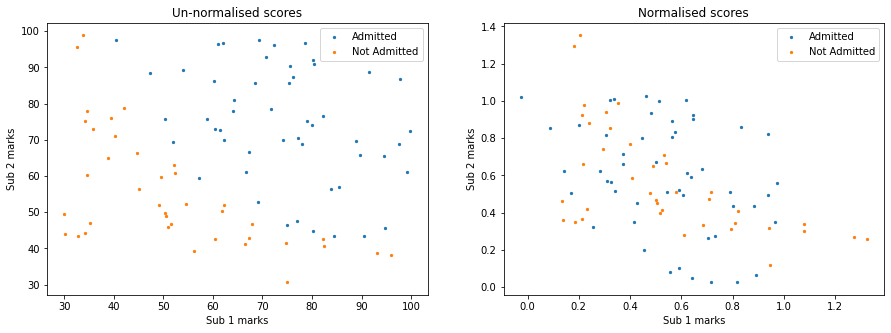

In [5]:
f = plt.figure()

f.set_figwidth(15)
f.set_figheight(5)

plt.subplot(1,2,1)
plt.title("Un-normalised scores")
plt.scatter(admitted[:,0], admitted[:,1], s=5 , label="Admitted")
plt.scatter(not_admitted[:,0], not_admitted[:,1], s=5, label="Not Admitted")
plt.xlabel("Sub 1 marks")
plt.ylabel("Sub 2 marks")
plt.legend()

plt.subplot(1,2,2)
plt.title("Normalised scores")
plt.scatter(_admitted[:,0], _admitted[:,1], s=5, label="Admitted")
plt.scatter(_not_admitted[:,0], _not_admitted[:,1], s=5, label="Not Admitted")
plt.xlabel("Sub 1 marks")
plt.ylabel("Sub 2 marks")
plt.legend()

### The Hypothesis function

In [6]:
def _h(theta, X):
    z = np.dot(X,theta)
    
    return sigmoid(z)

def sigmoid(z):
    return 1/(1+np.exp(-z))

### Gradient Descent 

In [7]:
def gradDes(X, y, theta, alpha = 0.001):
    m = X.shape[0]
    
    for _ in range(1000):
        h = _h(theta, X)
        
        theta = theta - ((alpha/m)*np.sum((h - y)*X, axis = 0)).reshape(theta.shape[0],1)
        
    return theta

### Cost Function, gradient function & few utility functions

In [8]:
def cost_function(theta, X, y):
    # Computes the cost function for all the training samples
    
    z = np.dot(X,theta)       # theta-> 3 x 1; X-> m x 3
    h = 1/(1+np.exp(-z))      # h -> m x 1
    
    m = X.shape[0]
    cost = np.multiply(-y,np.log(h))- np.multiply((1-y),np.log(1-h))
    
    J = (1/m)*np.sum(cost)
    
    return J

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

### The Optimizer function
* fmin_tnc is an optimization solver that finds the minimum of an unconstrained function.
* For logistic regression, we want to optimize the cost function with the parameters theta.
* This is a faster method as compared to gradeint descent which might fail or take huge amounts
  of time for optimizing theta

In [9]:
'''
Arguements : 

1. The initial values of the parameters we are trying to optimize.----> x0
2. A function that, when given the training set and a particular
theta,computes the logistic regression cost and gradient with
respect to theta for the dataset (X, y).------------------------------> cost_function
3. Gradient of cost function -----------------------------------------> gradient
'''

def fit(x, y, theta):
    # Calls in-built optimization function to get optimal values for theta
    opt_weights = opt.fmin_tnc(func = cost_function, x0=theta, fprime = gradient, args=(x, y.flatten()))
    
    return opt_weights[0]

### Initialising theta and calling "fit" function to get optimal theta values

In [10]:
theta = np.array(np.zeros((X.shape[1],1)))
#params = gradDes(X,y,theta)
params = fit(X, y, theta)

params

array([-25.07542357,   0.20585712,   0.19714728])

***
### Writing down hypothesis using our obtained optimal parameters
* h(X) =   theta.X
* To see the decision boundary we equate h(X) to 0 to make the eqn 2-D
* We then take subject 1 marks as x_val [as it was in the previousdata plot]
  and calculate subject 2 marks using our hypothesis:
  
  x2 = -(params[1]*x1 +params[0])/params[2]
  
* For the plot y_val = x2, x_val = x1

In [11]:
x_val = X[:,1]

#y_val = -(params[1][0]*x_val +params[0][0])/params[2][0]
y_val = -(params[1]*x_val +params[0])/params[2]

### Seeing our Decision Boundary

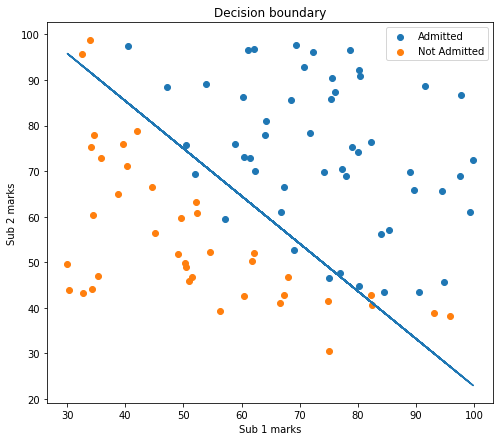

In [12]:
f = plt.figure()

f.set_figwidth(8)
f.set_figheight(7)
plt.title("Decision boundary")
plt.scatter(admitted[:,0], admitted[:,1], label = "Admitted")
plt.scatter(not_admitted[:,0], not_admitted[:,1],  label="Not Admitted")
plt.xlabel("Sub 1 marks")
plt.ylabel("Sub 2 marks")
plt.plot(x_val,y_val, "-")
plt.legend()

### Testing our model

In [13]:
y_res = probability(params, X_test)

for i in range(len(y_res)):
    if y_res[i] >= 0.5:
        y_res[i] = 1
    else:
        y_res[i] = 0

y_res = y_res.reshape((len(y_res),1))

successful = 0
for i in range(len(y_res)):
    if y_res[i] == y_test[i]:
        successful = successful+1
    else:
        continue

print("Sucess rate : ", (successful/len(y_test))*100, "%")

Sucess rate :  90.0 %
